In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [ ]:
#Import Training Data Set

In [2]:
CAMS = pd.read_csv('TrainingToGo.csv')
CAMS

,q(AU),qerror,a(AU),e,eerror,"i(º,J2000)",ierror,w(º),werror,Node(º),Nodeerror,danger
0,1.202790,1.269800e-07,1.377223,0.126656,8.990400e-08,13.664672,0.000011,144.828132,0.000094,319.015283,0.000026,0
1,0.640327,2.551000e-07,1.548883,0.586588,1.567800e-07,8.554460,0.000019,293.329681,0.000041,144.052793,0.000028,0
2,0.263830,2.510000e-03,1.260000,0.790500,2.800000e-03,6.490000,0.460000,312.370000,0.320000,149.857000,0.003000,1
3,0.457223,1.611000e-06,1.632903,0.719994,1.030000e-06,20.105759,0.000133,321.511105,0.000116,355.456295,0.000089,0
4,1.252622,3.197500e-07,2.749196,0.544368,1.032300e-07,9.806720,0.000014,58.997814,0.000248,258.145028,0.000084,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7387,0.542169,5.821000e-05,0.875558,0.380774,6.500500e-05,16.121236,0.003261,244.198429,0.000915,149.182417,0.001664,0
7388,0.661300,9.130000e-03,2.410000,0.725300,1.270000e-02,2.200000,0.570000,257.590000,1.620000,323.161000,0.011000,1
7389,1.256004,3.760900e-07,2.115187,0.406197,1.756400e-07,28.681173,0.000018,330.753677,0.000072,132.064346,0.000007,0
7390,0.972850,4.300000e-04,3.140000,0.689900,2.200000e-03,23.150000,0.040000,18.110000,0.200000,37.232000,0.000000,1


In [276]:
CAMS['danger'].value_counts()

0    5706
1    1686
Name: danger, dtype: int64

In [ ]:
#Feature Values Distribution

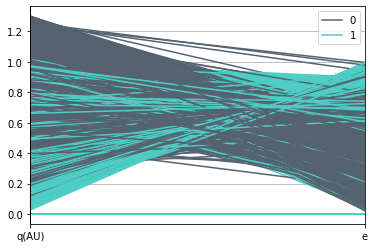

In [267]:

pd.plotting.parallel_coordinates(
    CAMS[['q(AU)','e','danger']], 'danger', color=('#556270', '#4ECDC4')
)

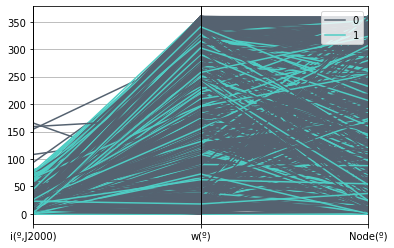

In [268]:

pd.plotting.parallel_coordinates(
    CAMS[['i(º,J2000)','w(º)','Node(º)','danger']], 'danger', color=('#556270', '#4ECDC4')
)

In [252]:
X = CAMS[['q(AU)','e','i(º,J2000)','w(º)','Node(º)']].values  #.astype(float)
X

array([[1.20e+00, 1.27e-01, 1.37e+01, 1.45e+02, 3.19e+02],
       [6.40e-01, 5.87e-01, 8.55e+00, 2.93e+02, 1.44e+02],
       [2.64e-01, 7.90e-01, 6.49e+00, 3.12e+02, 1.50e+02],
       ...,
       [1.26e+00, 4.06e-01, 2.87e+01, 3.31e+02, 1.32e+02],
       [9.73e-01, 6.90e-01, 2.31e+01, 1.81e+01, 3.72e+01],
       [1.27e+00, 3.20e-01, 3.88e+01, 1.62e+02, 2.53e+02]])

In [95]:
y = CAMS['danger'].values
y[0:5]

array([0, 0, 1, 0, 0])

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
#Normalization only for Training Data Set

In [269]:
X_in = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X_in[0:5]

array([[ 0.98, -2.08, -0.4 , -0.4 ,  1.4 ],
       [-0.69,  0.19, -0.74,  1.06, -0.3 ],
       [-1.81,  1.2 , -0.88,  1.25, -0.24],
       [-1.23,  0.85,  0.04,  1.34,  1.76],
       [ 1.12, -0.02, -0.66, -1.25,  0.81]])

In [270]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X_in, y, test_size=0.2, random_state=5)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (5913, 5) (5913,)
Test set: (1479, 5) (1479,)


In [ ]:
#KNN Model

In [277]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k,weights='distance').fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [278]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([0, 0, 0, 1, 0])

In [279]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  1.0
Test set Accuracy:  0.9357674104124408


In [55]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.94, 0.93, 0.94, 0.94, 0.93, 0.94, 0.93, 0.93, 0.93])

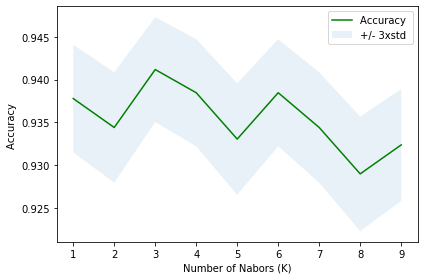

In [56]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [57]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9411764705882353 with k= 3


In [274]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, yhat, labels=[1,0]))

[[ 282   50]
 [  35 1112]]


Confusion matrix, without normalization
[[ 282   50]
 [  35 1112]]


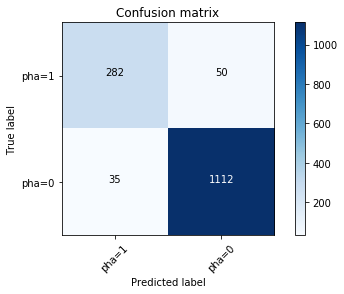

In [275]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['pha=1','pha=0'],normalize= False,  title='Confusion matrix')

In [60]:
print (classification_report(y_test, yhat))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1147
           1       0.88      0.81      0.84       332

    accuracy                           0.93      1479
   macro avg       0.91      0.89      0.90      1479
weighted avg       0.93      0.93      0.93      1479



In [ ]:
#Import Prediction Data Set

In [61]:
Test = pd.read_csv('TestingToGo.csv')
Test

,q(AU),qerror,a(AU),e,eerror,"i(º,J2000)",ierror,w(º),werror,Node(º),Nodeerror,danger
0,1.138769,1.292000e-07,1.924946,0.408415,6.618900e-08,7.309432,0.000009,234.271687,0.000079,112.483611,0.000065,0
1,0.888487,1.052000e-07,1.963527,0.547505,5.408600e-08,23.622233,0.000021,186.709984,0.000102,148.640539,0.000109,0
2,1.079568,3.835400e-07,2.516283,0.570967,1.537800e-07,14.672749,0.000022,37.383162,0.000123,167.346930,0.000041,0
3,0.960751,1.292700e-07,1.113587,0.137247,1.137800e-07,8.822850,0.000018,350.852525,0.000094,268.882125,0.000059,0
4,0.554991,1.293700e-07,1.621008,0.657626,7.934900e-08,24.390598,0.000010,77.753498,0.000022,77.703922,0.000025,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1836,1.168239,7.980500e-07,1.749853,0.332379,4.574400e-07,11.582987,0.000025,232.633609,0.000081,256.359912,0.000049,0
1837,1.146088,7.207000e-07,2.218476,0.483389,4.288900e-07,30.482511,0.000026,159.497966,0.000101,224.171131,0.000068,0
1838,0.688945,3.178300e-04,2.300334,0.700502,9.273500e-04,7.690269,0.006299,218.017074,0.009358,41.444249,0.015094,0
1839,1.067409,1.925800e-07,1.766268,0.395670,1.076500e-07,36.438313,0.000024,286.823542,0.000047,174.560855,0.000015,0


In [62]:
Test['danger'].value_counts()

0    1436
1     405
Name: danger, dtype: int64

In [253]:
V = Test[['q(AU)','e','i(º,J2000)','w(º)','Node(º)']].values  #.astype(float)
V

array([[  1.14,   0.41,   7.31, 234.27, 112.48],
       [  0.89,   0.55,  23.62, 186.71, 148.64],
       [  1.08,   0.57,  14.67,  37.38, 167.35],
       ...,
       [  0.69,   0.7 ,   7.69, 218.02,  41.44],
       [  1.07,   0.4 ,  36.44, 286.82, 174.56],
       [  1.02,   0.54,  39.65,   4.61, 267.21]])

In [98]:
w = Test['danger'].values
w[0:5]

array([0, 0, 0, 0, 1])

In [ ]:
#Normalization for Training and Prediction Data Set Altogether

In [254]:
A=np.concatenate((X, V), axis=0)
A

array([[1.20e+00, 1.27e-01, 1.37e+01, 1.45e+02, 3.19e+02],
       [6.40e-01, 5.87e-01, 8.55e+00, 2.93e+02, 1.44e+02],
       [2.64e-01, 7.90e-01, 6.49e+00, 3.12e+02, 1.50e+02],
       ...,
       [6.89e-01, 7.01e-01, 7.69e+00, 2.18e+02, 4.14e+01],
       [1.07e+00, 3.96e-01, 3.64e+01, 2.87e+02, 1.75e+02],
       [1.02e+00, 5.41e-01, 3.96e+01, 4.61e+00, 2.67e+02]])

In [255]:
A = preprocessing.StandardScaler().fit(A).transform(A.astype(float))
A

array([[ 0.98, -2.08, -0.38, -0.39,  1.42],
       [-0.74,  0.24, -0.74,  1.07, -0.29],
       [-1.89,  1.27, -0.88,  1.26, -0.24],
       ...,
       [-0.59,  0.82, -0.8 ,  0.33, -1.29],
       [ 0.56, -0.72,  1.19,  1.01,  0.01],
       [ 0.43,  0.01,  1.41, -1.76,  0.91]])

In [256]:
X=A[:7392]
X

array([[ 0.98, -2.08, -0.38, -0.39,  1.42],
       [-0.74,  0.24, -0.74,  1.07, -0.29],
       [-1.89,  1.27, -0.88,  1.26, -0.24],
       ...,
       [ 1.14, -0.67,  0.65,  1.44, -0.41],
       [ 0.27,  0.76,  0.27, -1.63, -1.34],
       [ 1.19, -1.1 ,  1.36, -0.22,  0.77]])

In [257]:
V=A[7392:]
V

array([[ 0.78, -0.66, -0.82,  0.49, -0.6 ],
       [ 0.02,  0.04,  0.3 ,  0.02, -0.25],
       [ 0.6 ,  0.16, -0.31, -1.44, -0.06],
       ...,
       [-0.59,  0.82, -0.8 ,  0.33, -1.29],
       [ 0.56, -0.72,  1.19,  1.01,  0.01],
       [ 0.43,  0.01,  1.41, -1.76,  0.91]])

In [ ]:
#KNN Model

In [280]:

kG = 5
#Train Model and Predict  
neighG = KNeighborsClassifier(n_neighbors = kG,weights='distance').fit(X,y)
neighG

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='distance')

In [281]:
what = neighG.predict(V)
what[0:5]

array([0, 1, 0, 0, 0])

In [282]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y, neighG.predict(X)))
print("Test set Accuracy: ", metrics.accuracy_score(w, what))

Train set Accuracy:  1.0
Test set Accuracy:  0.8164041281912005


In [283]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(w, what, labels=[1,0]))

[[ 122  283]
 [  55 1381]]


Confusion matrix, without normalization
[[ 122  283]
 [  55 1381]]


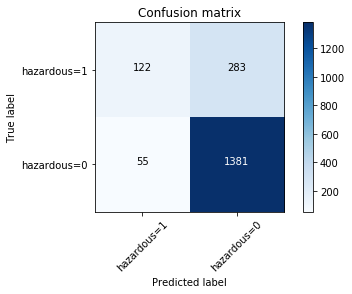

In [286]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(w, what, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['hazardous=1','hazardous=0'],normalize= False,  title='Confusion matrix')

In [285]:
print (classification_report(w, what))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1436
           1       0.69      0.30      0.42       405

    accuracy                           0.82      1841
   macro avg       0.76      0.63      0.66      1841
weighted avg       0.80      0.82      0.79      1841

